###**Importing Necessary Libraries**


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline

### **Loading Dataset**

In [2]:
df = pd.read_csv("Iris.csv")

### **Basic Understanding of Data**

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Data Cleaning**

In [11]:
df.drop("Id",axis=1,inplace=True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
df.drop_duplicates(inplace=True)


### **Exploratory Data Analysis (EDA)**

<function matplotlib.pyplot.show(close=None, block=None)>

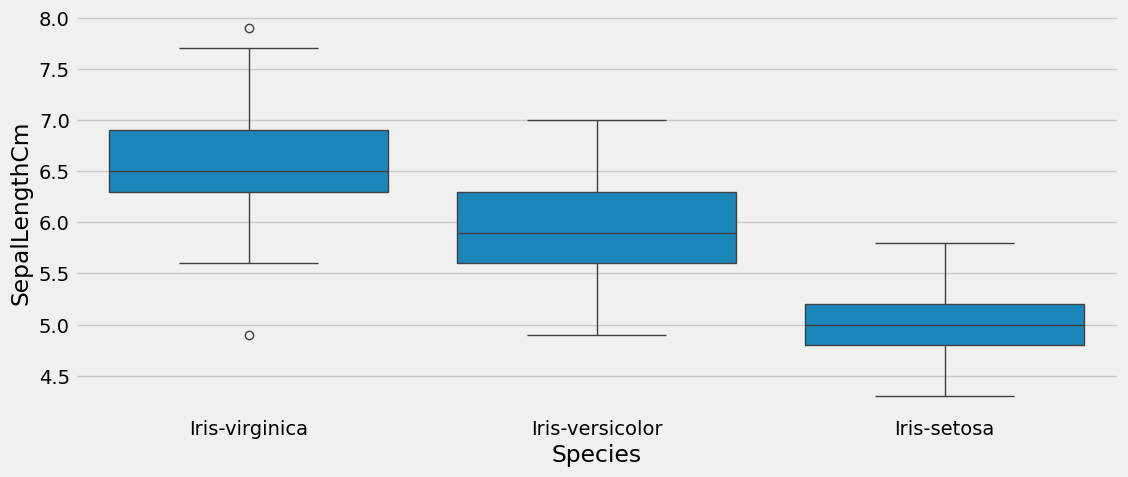

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))
plt.show

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

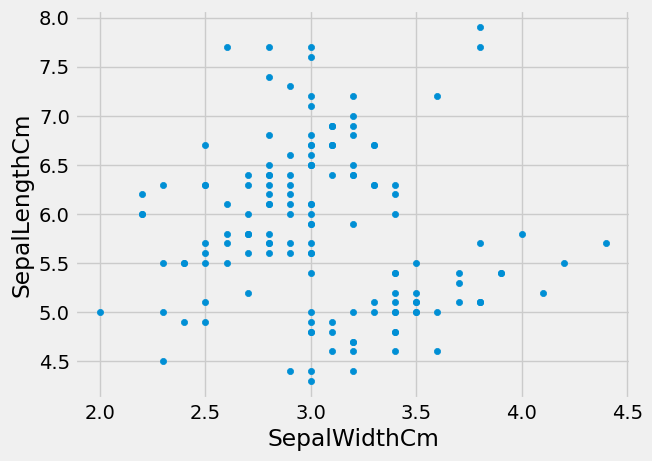

In [20]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

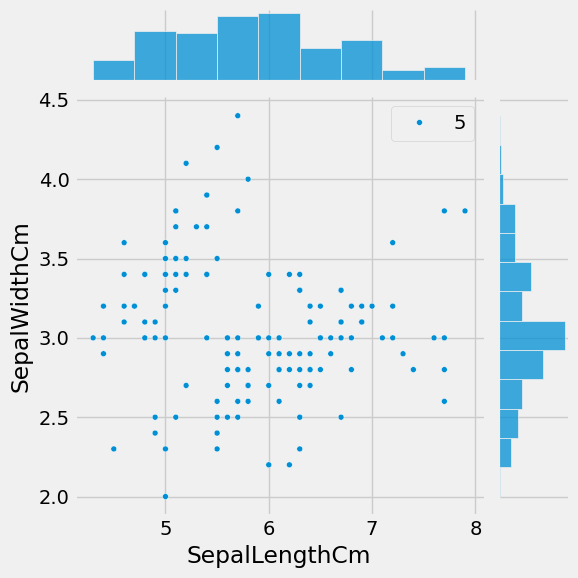

In [21]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

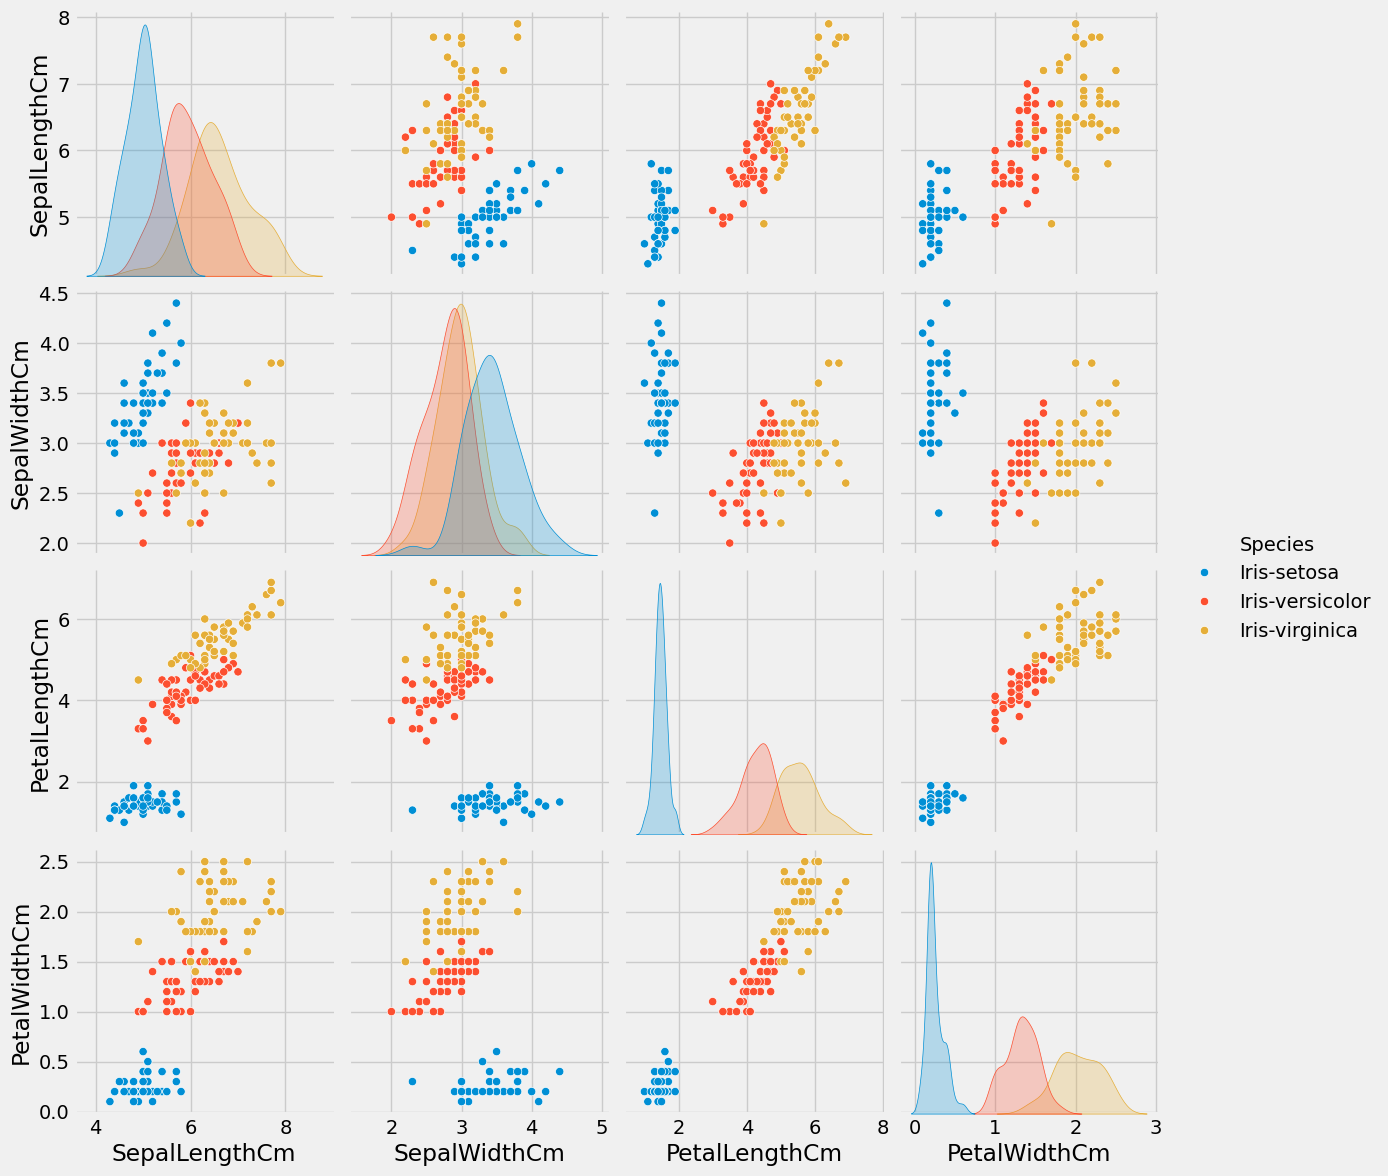

In [22]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

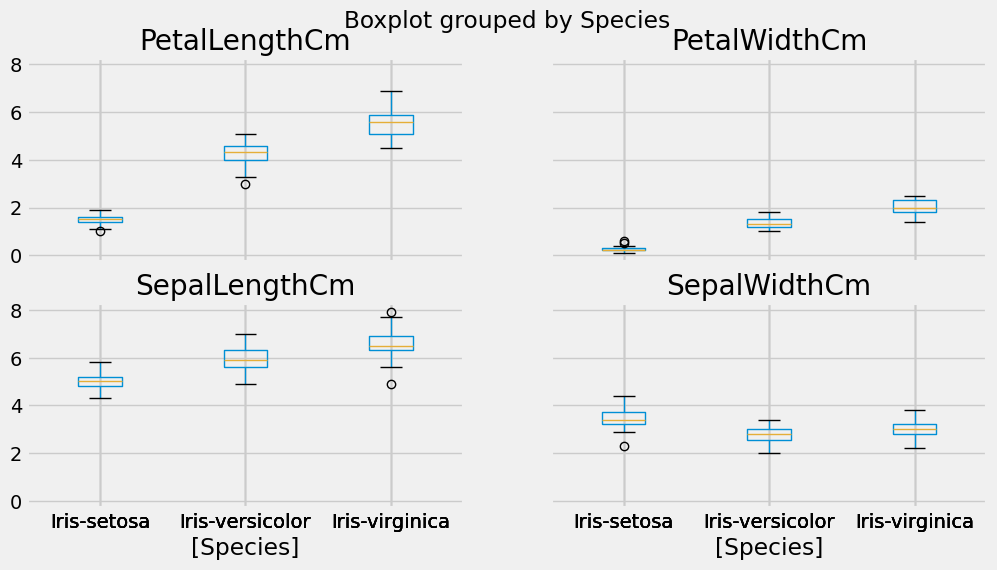

In [23]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

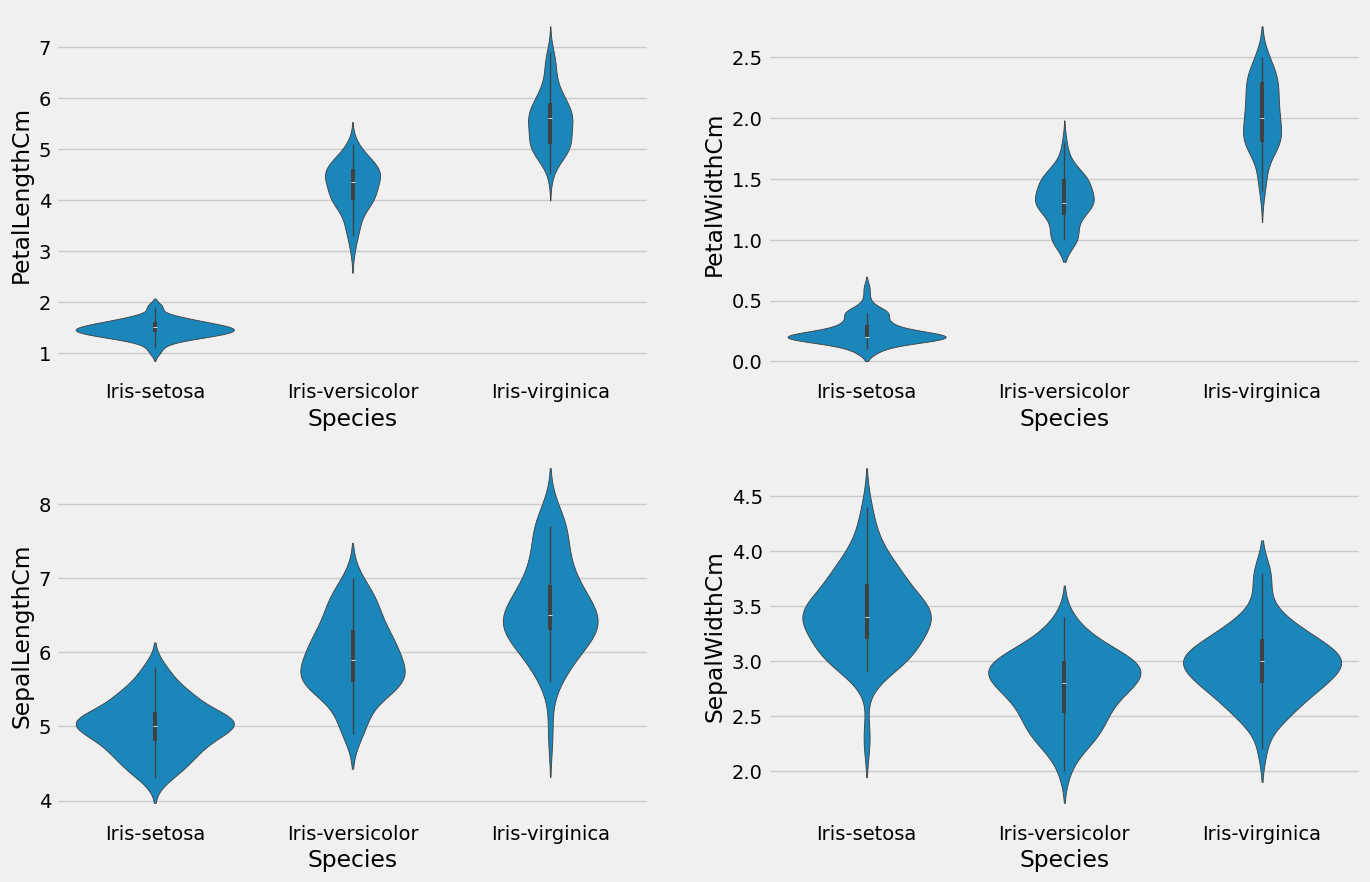

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [25]:
X=df.drop('Species',axis=1)
y=df['Species']


### **Neural Networks**

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [27]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [29]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))
model.add(Dense(3,activation='softmax'))

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


### **Training Model**

In [31]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 119ms/step - loss: 1.5753 - accuracy: 0.3333 - val_loss: 1.3813 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 20ms/step - loss: 1.3302 - accuracy: 0.3333 - val_loss: 1.1845 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 15ms/step - loss: 1.1515 - accuracy: 0.3333 - val_loss: 1.0555 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 19ms/step - loss: 1.0475 - accuracy: 0.4118 - val_loss: 0.9732 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 15ms/step - loss: 0.9762 - accuracy: 0.6471 - val_loss: 0.9187 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 19ms/step - loss: 0.9246 - accuracy: 0.5784 - val_loss: 0.8769 - val_accuracy: 0.6000
Epoch 7/45
4/4 [==============================] - 0s 20ms/step - loss: 0.8830 - accuracy: 0.5196 - val_loss: 0.8406 - val_accuracy: 0.6889
Epoch 8/45
4/4 [==========

In [32]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3893 - accuracy: 0.8889


[0.3892826437950134, 0.8888888955116272]


### **Testing Model**

In [33]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 87ms/step
[[0.00505377 0.31644675 0.6784996 ]
 [0.00403978 0.30064905 0.6953112 ]
 [0.06213757 0.5484434  0.38941902]
 [0.0361133  0.50376374 0.4601229 ]
 [0.9358193  0.05107979 0.01310082]
 [0.03457878 0.54201996 0.42340124]
 [0.00456699 0.2740878  0.7213451 ]
 [0.00513317 0.28485295 0.7100139 ]
 [0.93667316 0.05040069 0.01292611]
 [0.01116282 0.36158615 0.627251  ]]


In [34]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [35]:
history.history['accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.4117647111415863,
 0.6470588445663452,
 0.5784313678741455,
 0.5196078419685364,
 0.5784313678741455,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.813725471496582,
 0.8235294222831726,
 0.7058823704719543,
 0.7549019455909729,
 0.9215686321258545,
 0.9411764740943909,
 0.9411764740943909,
 0.8627451062202454,
 0.7156862616539001,
 0.6764705777168274,
 0.813725471496582,
 0.9411764740943909,
 0.9509803652763367,
 0.9411764740943909,
 0.970588207244873,
 0.8823529481887817,
 0.8039215803146362,
 0.8529411554336548,
 0.8529411554336548,
 0.8529411554336548,
 0.8921568393707275,
 0.9313725233078003,
 0.9313725233078003,
 0.9313725233078003,
 0.9607843160629272,
 0.970588207244873,
 0.9803921580314636,
 0.9607843160629272,
 0.9607843160629272,
 0.9509803652763367,
 0.9411764740943909,
 0.9411764740943909]

In [36]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.6666666865348816,
 0.6666666865348816,
 0.6000000238418579,
 0.6888889074325562,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7555555701255798,
 0.8222222328186035,
 0.7555555701255798,
 0.7555555701255798,
 0.8222222328186035,
 0.8888888955116272,
 0.8888888955116272,
 0.8222222328186035,
 0.7777777910232544,
 0.7333333492279053,
 0.7777777910232544,
 0.8888888955116272,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.8888888955116272,
 0.7777777910232544,
 0.7777777910232544,
 0.8222222328186035,
 0.8222222328186035,
 0.8444444537162781,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272,
 0.9777777791023254,
 0.9777777791023254,
 0.9111111164093018,
 0.8888888955116272,
 0.9111111164093018,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272]


### **Evaluating Model**

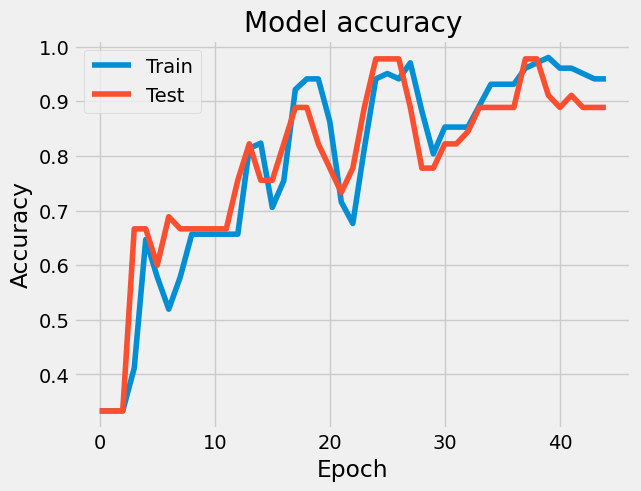

In [37]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [44]:
model.fit(X_train,y_train)

4/4 [==============================] - 0s 14ms/step - loss: 0.3882 - accuracy: 0.9510


In [45]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [46]:
y_pred

array([[0.00501897, 0.33406857, 0.6609124 ],
       [0.00403123, 0.32053226, 0.67543644],
       [0.06184797, 0.5667055 , 0.37144652],
       [0.03600184, 0.52450705, 0.4394911 ],
       [0.9382686 , 0.04996081, 0.01177053],
       [0.03439363, 0.56417674, 0.40142956],
       [0.00452174, 0.2879347 , 0.7075435 ],
       [0.00508807, 0.2993515 , 0.69556046],
       [0.9390641 , 0.04932261, 0.01161334],
       [0.01108657, 0.37778842, 0.61112493],
       [0.9523643 , 0.03898277, 0.00865288],
       [0.01719107, 0.440459  , 0.54234993],
       [0.05221188, 0.60754657, 0.34024158],
       [0.00918391, 0.40020737, 0.5906087 ],
       [0.88480544, 0.09213524, 0.02305942],
       [0.89496744, 0.08335753, 0.02167519],
       [0.01966633, 0.4764845 , 0.50384927],
       [0.01902163, 0.43542787, 0.5455506 ],
       [0.01040219, 0.37376037, 0.61583745],
       [0.00763455, 0.38193575, 0.6104297 ],
       [0.00222942, 0.2751622 , 0.72260845],
       [0.00439923, 0.29845178, 0.69714904],
       [0.